In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## train custom model

library_seat_detection/yolov5 폴더 내에 dataset.yaml 파일생성하기. 파일 내용은 아래와 같음

dataset.yaml 파일 코드를 예시와 같이 구성하려면 library_seat_detection 폴더의 구성은 다음과 같음. <br><br>
<li>본 파일, yolov5 클론한 폴더, data 폴더</li> <br> dataset.yaml파일은 yolov5 폴더 내에 새롭게 생성하고 코드 내용은 아래와 같이 설정<br> <br> 훈련시킬 이미지와 라벨은 data 폴더 내에 images 폴더와 labels 폴더를 생성하고 그 안에 넣기 (두 폴더내 파일 순서 일치하는지 확인해야함!)

In [4]:
# path: ../data #알맞은 경로 지정
# train: images #알맞은 경로 지정
# val: images #알맞은 경로 지정

# # Classes
# names:
#   0: seat
#   1: chair
#   2: person

## 학습시킨 모델 load

'yolov5/runs/train//*exp(알맞은폴더)*/weights' 폴더 내에 best.pt 가중치를 넣고 run

In [10]:
model = torch.hub.load('ultralytics/yolov5','custom', path='yolov5/runs/train/exp/weights/best.pt', force_reload=True) #15epoch
# model = torch.hub.load('ultralytics/yolov5','custom', path='yolov5/runs/train/exp2/weights/best.pt', force_reload=True) #66epoch

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\ballj/.cache\torch\hub\master.zip
YOLOv5  2023-5-11 Python-3.10.9 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce MX350, 2048MiB)



requirements: C:\Users\ballj\.cache\torch\hub\requirements.txt not found, check failed.


Fusing layers... 
YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


<function matplotlib.pyplot.show(close=None, block=None)>

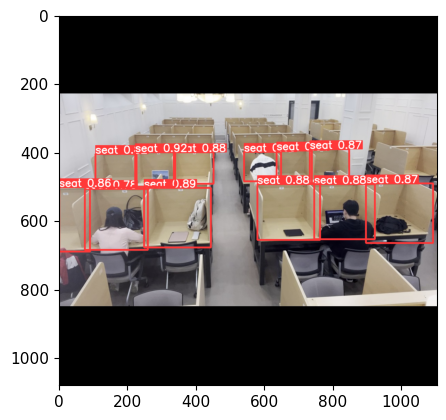

In [11]:
%matplotlib inline

det = 'tests/test.jpg'
results = model(det)
plt.imshow(np.squeeze(results.render()))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

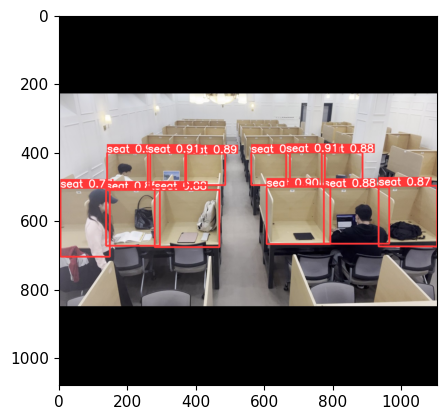

In [12]:
det = 'tests/000061.jpg'
results = model(det)
plt.imshow(np.squeeze(results.render()))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

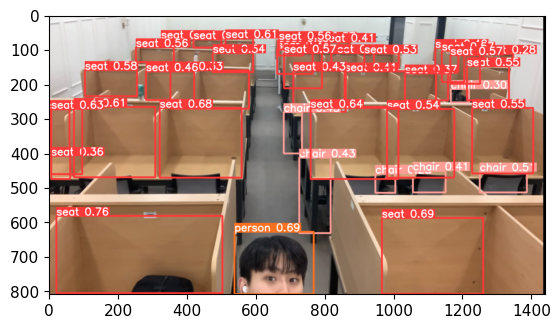

In [8]:
det = 'tests/test3.jpg'
results = model(det)
plt.imshow(np.squeeze(results.render()))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

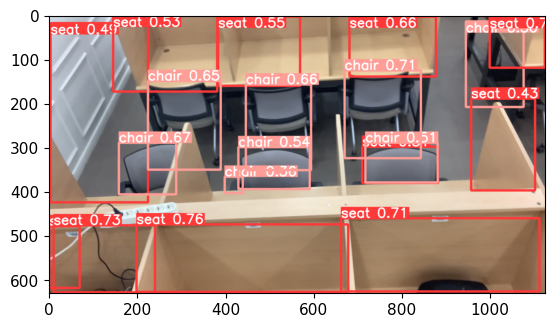

In [9]:
det = 'tests/test4.jpg'
results = model(det)
plt.imshow(np.squeeze(results.render()))
plt.show

In [22]:
cap = cv2.VideoCapture('tests/testvideo.mp4') #영상은 같은 directory에 놓고 0 대신 'library1.mp4'이런식으로 넣으면 됨. 0은 내 웹캠!
while cap.isOpened():
    ret, frame = cap.read()
    
    # detection
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'